In [1]:
"""
Work inspired / copied from here:
http://www.quora.com/What-is-the-future-of-data-science-1
"""

'\nWork inspired / copied from here:\nhttp://www.quora.com/What-is-the-future-of-data-science-1\n'

In [2]:
"""
Dataset found here:
http://forge.scilab.org/index.php/p/rdataset/source/tree/master/datasets.csv
many other interesting datasets here too!!!
"""

'\nDataset found here:\nhttp://forge.scilab.org/index.php/p/rdataset/source/tree/master/datasets.csv\nmany other interesting datasets here too!!!\n'

In [3]:
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

import ipdb

/Users/charilaostsarouchas/anaconda/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module argparse was already imported from /Users/charilaostsarouchas/anaconda/lib/python2.7/argparse.pyc, but /Users/charilaostsarouchas/anaconda/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


In [4]:
affairs = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/Ecdat/Fair.csv"
df = pd.read_csv(affairs)   
df = df.drop(df.columns[0], axis=1)
df.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,male,37,10.00,no,3,18,7,4,0
1,female,27,4.00,no,4,14,6,4,0
2,female,32,15.00,yes,1,12,1,4,0
3,male,57,15.00,yes,5,18,6,5,0
4,male,22,0.75,no,2,17,6,3,0


In [5]:
df.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,male,37,10.00,no,3,18,7,4,0
1,female,27,4.00,no,4,14,6,4,0
2,female,32,15.00,yes,1,12,1,4,0
3,male,57,15.00,yes,5,18,6,5,0
4,male,22,0.75,no,2,17,6,3,0


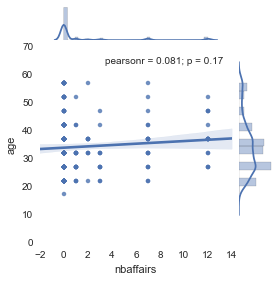

In [6]:
sns.jointplot(x="nbaffairs", y="age", data=df[df.sex=="male"], kind="reg", size=4);

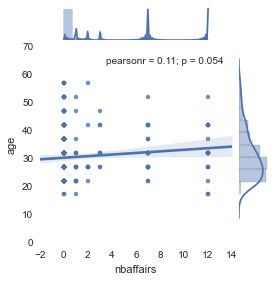

In [7]:
sns.jointplot(x="nbaffairs", y="age", data=df[df.sex=="female"], kind="reg", size=4);

In [8]:
# For the shake of the classification pbm we create the target affair , boolean true if even 1 affair

In [9]:
df["affair"] = df.nbaffairs>0

In [10]:
# And now we want to rank the variables using as target the affair

In [11]:
def entropy(data, target_attr):
    """
    Calculates the entropy of the given data set for the target attribute.
    """
    val_freq     = {}
    data_entropy = 0.0

    # Calculate the frequency of each of the values in the target attr
    for record in data:
        ipdb.set_trace()
        if (val_freq.has_key(record[target_attr])):
            val_freq[record[target_attr]] += 1.0
        else:
            val_freq[record[target_attr]]  = 1.0

    # Calculate the entropy of the data for the target attribute
    for freq in val_freq.values():
        data_entropy += (-freq/len(data)) * math.log(freq/len(data), 2) 
        
    return data_entropy

In [ ]:
data = df.to_dict()
entropy(data, "affair")

type(data)

ipdb> record
ipdb> data
ipdb> data["affair"]


In [23]:
def gain(data, attr, target_attr):
    """
    Calculates the information gain (reduction in entropy) that would
    result by splitting the data on the chosen attribute (attr).
    """
    val_freq       = {}
    subset_entropy = 0.0

    # Calculate the frequency of each of the values in the target attribute
    for record in data:
        if (val_freq.has_key(record[attr])):
            val_freq[record[attr]] += 1.0
        else:
            val_freq[record[attr]]  = 1.0

    # Calculate the sum of the entropy for each subset of records weighted
    # by their probability of occuring in the training set.
    for val in val_freq.keys():
        val_prob        = val_freq[val] / sum(val_freq.values())
        data_subset     = [record for record in data if record[attr] == val]
        subset_entropy += val_prob * entropy(data_subset, target_attr)

    # Subtract the entropy of the chosen attribute from the entropy of the
    # whole data set with respect to the target attribute (and return it)
    return (entropy(data, target_attr) - subset_entropy)

In [26]:
entropy(df[["religious", "education"]].values, "affair")

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices